# Can LIME work with unsupervised techniques?

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import lime
import lime.lime_tabular
np.random.seed(123)

In [14]:
# Generate some data
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)

In [15]:
# Creating pandas dataframe from numpy array
dataset = pd.DataFrame({'A':X[:,0],'B':X[:,1]})
dataset[:5]

,A,B
0,0.250064,6.488267
1,-2.697986,2.521947
2,-2.900076,3.068773
3,0.702951,4.314275
4,-2.535635,2.384499


In [16]:
class_names=['group 1', 'group 2', 'group 3', 'group 4']

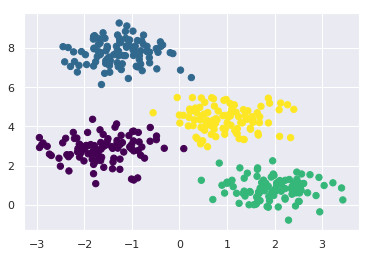

In [17]:
# Plot the data with K Means Labels
from sklearn.cluster import KMeans
kmeans = KMeans(4, random_state=0)
labels = kmeans.fit(dataset).predict(dataset)
plt.scatter(dataset['A'], dataset['B'], c=labels, s=40, cmap='viridis');

## Explaining k-Means predictions using lime

In [18]:
explainer = lime.lime_tabular.LimeTabularExplainer(dataset, feature_names=dataset.columns, class_names=['group 1', 'group 2', 'group 3', 'group 4'], discretize_continuous=False)

### LIME does not currently support classifier models without probability scores

In [19]:
i = 0
exp = explainer.explain_instance(dataset.values[i], kmeans.predict)
exp.as_list()

NotImplementedError: LIME does not currently support classifier models without probability scores. If this conflicts with your use case, please let us know: https://github.com/datascienceinc/lime/issues/16

## Explaining GMM predictions using lime
GMM outputs class probabilities

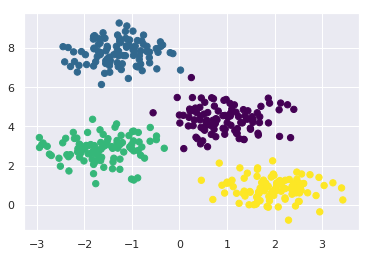

In [20]:
from sklearn import mixture
gmm = mixture.GaussianMixture(n_components=4).fit(dataset)
labels = gmm.predict(dataset)
plt.scatter(dataset['A'], dataset['B'], c=labels, s=40, cmap='viridis');

In [21]:
probs = gmm.predict_proba(dataset)
print(probs[:5].round(3))

[[0.531 0.469 0.    0.   ]
 [0.    0.    1.    0.   ]
 [0.    0.    1.    0.   ]
 [1.    0.    0.    0.   ]
 [0.    0.    1.    0.   ]]


Previously, we used the default parameter for label when generating explanation, which works well in the binary case.
For the multiclass case, we have to determine for which labels we will get explanations, via the 'labels' parameter.
Below, we generate explanations for labels 0 to 3.

In [22]:
explainer = lime.lime_tabular.LimeTabularExplainer(dataset, feature_names=dataset.columns, class_names=class_names, discretize_continuous=False)

In [23]:
i = 0
exp = explainer.explain_instance(dataset.values[i], gmm.predict_proba, num_features=2, labels=[0, 1])
print('Observation index: %d' % i)
print('Predicted class =', class_names[gmm.predict(dataset.values[0].reshape(1,-1))[0]])
print('True class: %s' % class_names[y_true[i]])

Observation index: 0
Predicted class = group 1
True class: group 4


Now, we can see the explanations for different labels. Notice that the positive and negative signs are with respect to a particular label - so that features that are negative towards Group 1 may be positive towards Group 4, and vice versa.

In [26]:
print ('Explanation for class %s' % class_names[0])
print ('\n'.join(map(str, exp.as_list(label=0))))
print ()
print ('Explanation for class %s' % class_names[1])
print ('\n'.join(map(str, exp.as_list(label=1))))

Explanation for class group 1
('A', 0.3661168789455867)
('B', -0.07606225434313427)

Explanation for class group 2
('B', 0.40702541558773353)
('A', -0.17267705613452836)
